#IE7275: Data Mining Project - Spring 2023

## Fake Job Posting Prediction - Group 42 - Naveen Pasala & Shiva Naga Jyothi Cherukuri

In [ ]:
#importing libraries 
import numpy as np
import pandas as pd

In [ ]:
#importing the data
from google.colab import files
datafile = files.upload() 

Saving fake_job_postings.csv to fake_job_postings.csv


In [ ]:
#loading the data to dataframe
df_jobs = pd.read_csv("fake_job_postings.csv")
df_jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
#number of records and attributes in dataset.
df_jobs.shape

(17880, 18)

In [ ]:
df_jobs.size

321840

In [ ]:
#statistics of numeric records
df_jobs.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


**Observation:** From the above statistics, we can see that all the numeric columns has maximum value as 1 and minimum as 0. All these attributes are binary categorical and these doesn't have any outliers.

**Count of fradulent and non-fradulent jobs in dataset**

In [ ]:
df_jobs.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

**Percentage of fradulent and non-fradulent jobs in dataset**

In [ ]:
df_jobs.fraudulent.value_counts()*100/df_jobs.shape[0]

0    95.1566
1     4.8434
Name: fraudulent, dtype: float64

**Plotting Fraudulent v/s Non-fraudulent Jobs in Dataset**

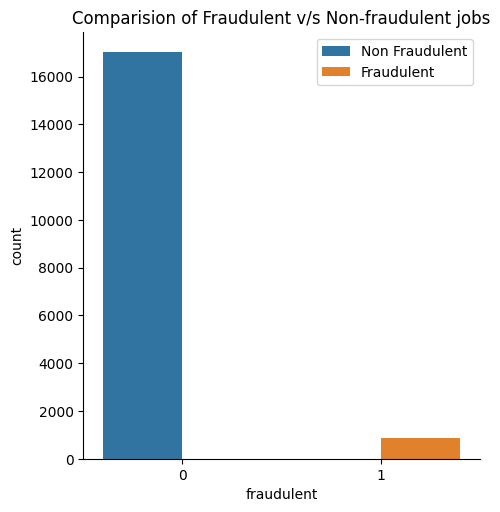

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x = 'fraudulent',
            data = df_jobs,
            kind = 'count', 
            legend=True,
            hue='fraudulent'
            )
plt.title('Comparision of Fraudulent v/s Non-fraudulent jobs')
plt.legend(['Non Fraudulent', 'Fraudulent'])
plt.show()

**Identifying null values**

In [ ]:
df_jobs.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

There are many null values in many attributes and above table is not showing clear picture hence we can calculate the percentage of missing values in each attribute.

In [ ]:
#Missing values percentage
print('Percentage of missing values in each column:')
df_jobs.isnull().sum()*100/df_jobs.shape[0]

Percentage of missing values in each column:


job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

**Dropping all the columns with more than 50% missing values as imputation will mislead the analysis**

In [ ]:
#Dropping all the columns with more than 50% missing values
df_jobs.drop(['department','salary_range'], axis=1, inplace=True)

In [ ]:
df_jobs.head()

,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
#information of columns
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   company_profile      14572 non-null  object
 4   description          17879 non-null  object
 5   requirements         15185 non-null  object
 6   benefits             10670 non-null  object
 7   telecommuting        17880 non-null  int64 
 8   has_company_logo     17880 non-null  int64 
 9   has_questions        17880 non-null  int64 
 10  employment_type      14409 non-null  object
 11  required_experience  10830 non-null  object
 12  required_education   9775 non-null   object
 13  industry             12977 non-null  object
 14  function             11425 non-null  object
 15  fraudulent           17880 non-null  int64 
dtypes: i

In [ ]:
print('Percentage of missing values in each column:')
df_jobs.isnull().sum()*100/df_jobs.shape[0]

Percentage of missing values in each column:


job_id                  0.000000
title                   0.000000
location                1.935123
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

Now, we can see that all columns with more than 50% missing values are dropped and remaining all the attributes with missing value are text fields. Hence, replacing all the NaN values in dataset with ''(i.e., blank).

In [ ]:
#Replacing the nulls in text field to ''.
df_jobs.fillna('',inplace=True)
df_jobs.head()

,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
#validating if there are anymore missing values
print('Percentage of missing values in each column:')
df_jobs.isnull().sum()*100/df_jobs.shape[0]

Percentage of missing values in each column:


job_id                 0.0
title                  0.0
location               0.0
company_profile        0.0
description            0.0
requirements           0.0
benefits               0.0
telecommuting          0.0
has_company_logo       0.0
has_questions          0.0
employment_type        0.0
required_experience    0.0
required_education     0.0
industry               0.0
function               0.0
fraudulent             0.0
dtype: float64

**Dropping Job_id, as it is unique column which cannot be used in analysis**

In [ ]:
df_jobs.drop(['job_id'], axis=1, inplace=True)
df_jobs.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


**Checking the distribution of records in each categorical columns**

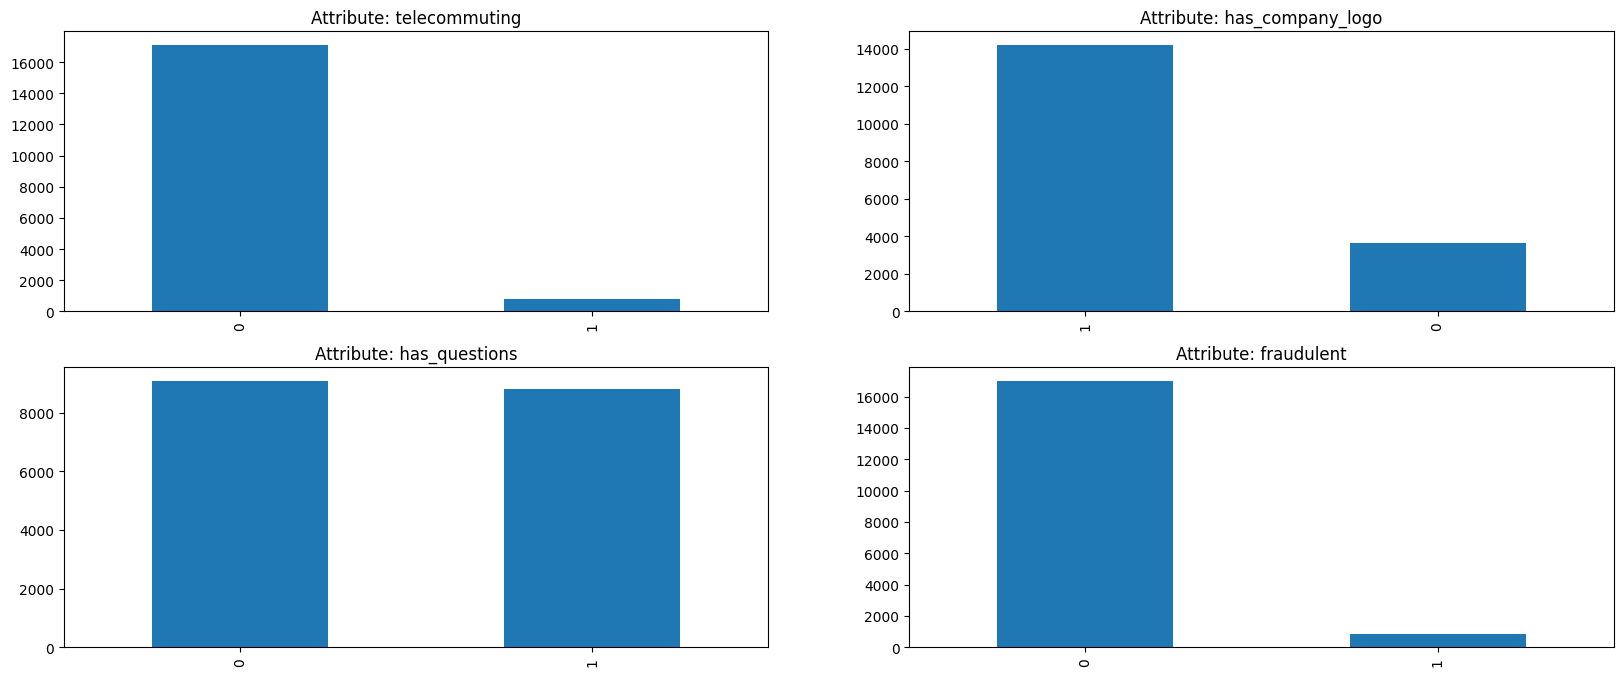

In [ ]:
#plots for distribution of records
x_columns = ['telecommuting', 'has_company_logo','has_questions','fraudulent']
plt.figure(figsize=(20,8))
i = 0
for col in x_columns:
  i +=1
  plt.subplot(2,2,i)
  df_jobs[col].value_counts().plot.bar()
  plt.title('Attribute:'+' '+col)
#plt.legend(['Non Fraudulent', 'Fraudulent'])
plt.show()

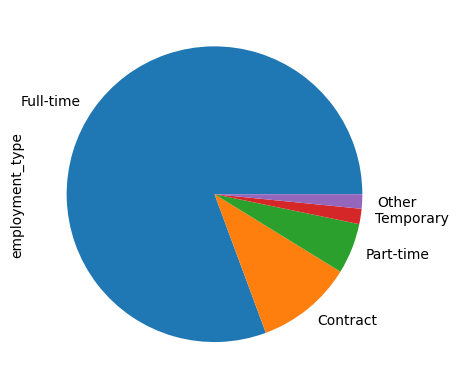

In [ ]:
#Pie chart to show distribution of employment_type
df_jobs[~(df_jobs['employment_type']=='')]['employment_type'].value_counts().plot.pie()
plt.show()

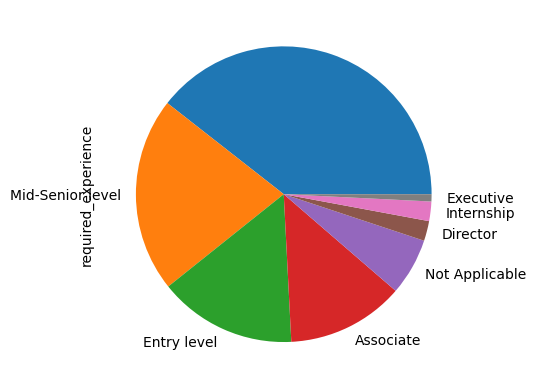

In [ ]:
#Pie chart to show distribution of required_experience
df_jobs['required_experience'].value_counts().plot.pie()
plt.show()

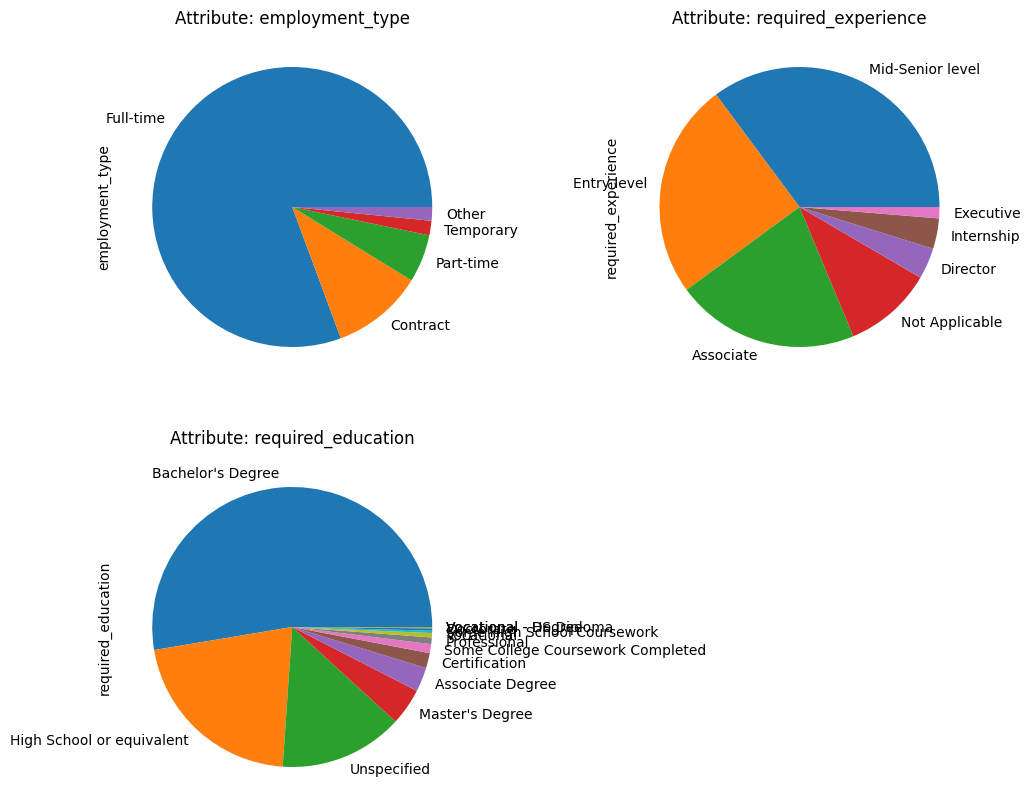

In [ ]:
x_columns = ['employment_type', 'required_experience','required_education']
plt.figure(figsize=(12,10))
i = 0
for col in x_columns:
  i +=1
  plt.subplot(2,2,i)
  df_jobs[~(df_jobs[col] == '')][col].value_counts().plot.pie()
  plt.title('Attribute:'+' '+col)
#plt.legend(['Non Fraudulent', 'Fraudulent'])
plt.show()

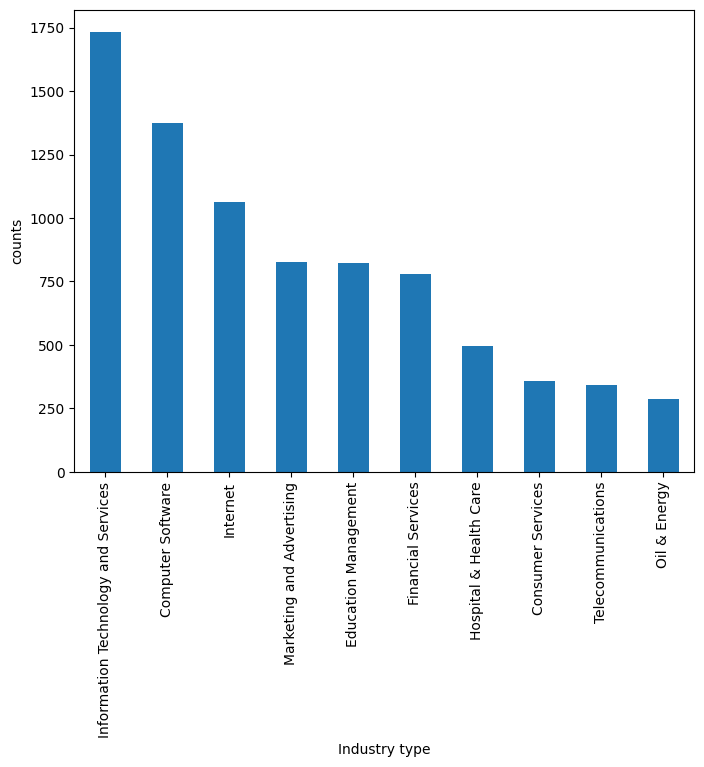

In [ ]:
#Bar plot to show distribution of different industries
plt.figure(figsize =(8,6))
df_jobs[~(df_jobs['industry'] == '')].industry.value_counts().head(10).plot.bar()
plt.xlabel('Industry type')
plt.ylabel('counts')
plt.show()

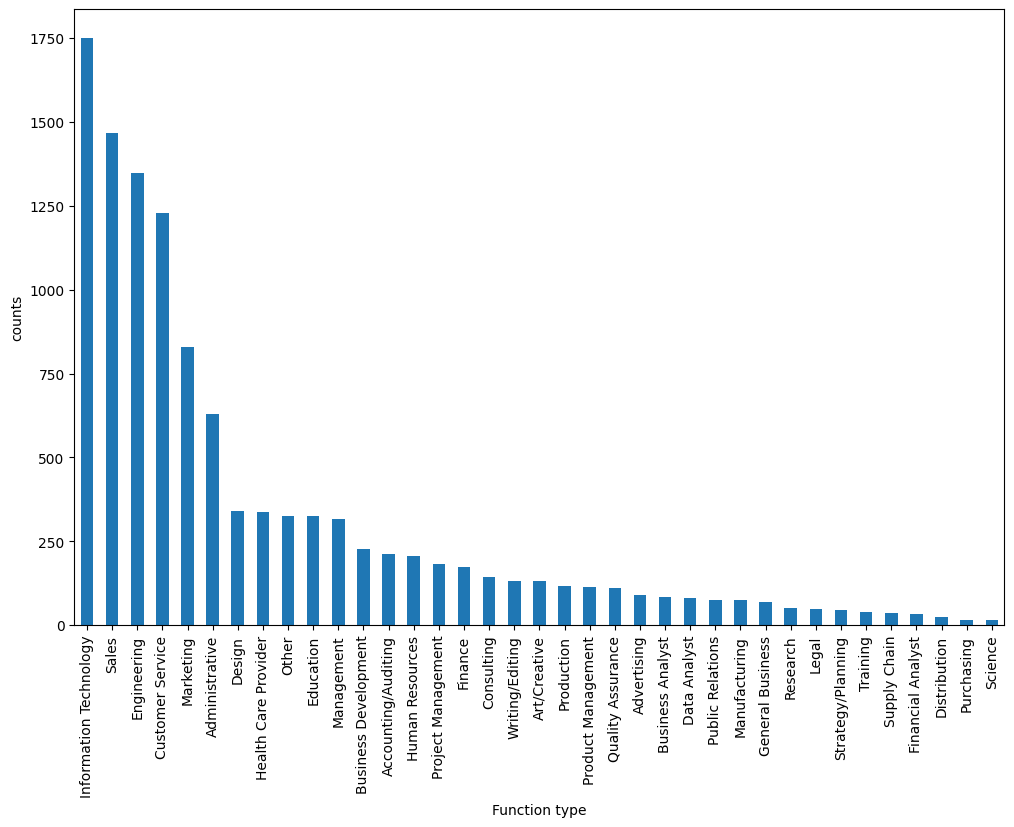

In [ ]:
#Bar plot to show distribution of different function types
plt.figure(figsize =(12,8))
df_jobs[~(df_jobs['function'] == '')]['function'].value_counts().plot.bar()
plt.xlabel('Function type')
plt.ylabel('counts')
plt.show()

**Checking for Outliers:**

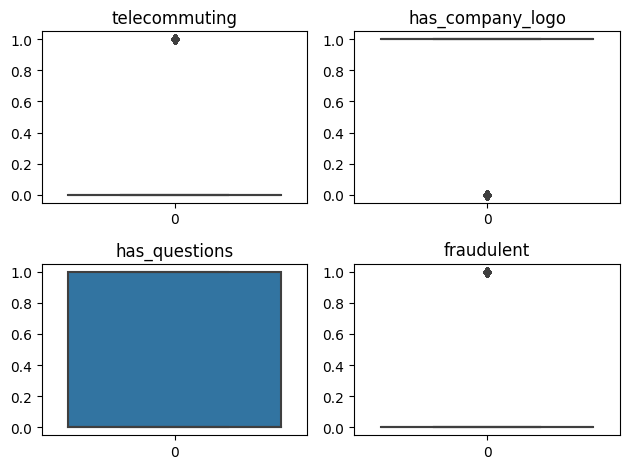

In [ ]:
#box plot for identifying outliers
x_columns = ['telecommuting', 'has_company_logo','has_questions','fraudulent']
n = 0
for column in x_columns:
  n = n+1
  plt.subplot(2, 2, n) 
  sns.boxplot(df_jobs[column])
  plt.title(str(column))
plt.tight_layout()
plt.show()

**Converting Employment_type and Required_experience into binary catergorical attributes for each type of employee and their experience**

In [ ]:
df_jobs2 = df_jobs[['employment_type']]
df_jobs2.head()

,employment_type
0,Other
1,Full-time
2,
3,Full-time
4,Full-time


In [ ]:
#one-hot encoding to convert categorical columns to dummy variables.
df_jobs2_emp_conv = pd.get_dummies(df_jobs2.employment_type)

In [ ]:
df_jobs2_emp_conv = df_jobs2_emp_conv[['Contract','Full-time','Other','Part-time','Temporary']]
df_jobs2_emp_conv

,Contract,Full-time,Other,Part-time,Temporary
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
17875,0,1,0,0,0
17876,0,1,0,0,0
17877,0,1,0,0,0
17878,1,0,0,0,0


In [ ]:
df_jobs = pd.concat([df_jobs, df_jobs2_emp_conv], axis=1)
df_jobs.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Contract,Full-time,Other,Part-time,Temporary
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,0,0,1,0,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,0,1,0,0,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,0,0,0,0,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,1,0,0,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,1,0,0,0


In [ ]:
df_jobs.required_experience.unique()

array(['Internship', 'Not Applicable', '', 'Mid-Senior level',
       'Associate', 'Entry level', 'Executive', 'Director'], dtype=object)

In [ ]:
df_jobs_req_exp = pd.get_dummies(df_jobs.required_experience)
df_jobs_req_exp = df_jobs_req_exp[['Internship','Not Applicable','Mid-Senior level','Associate','Entry level','Executive','Director']]
df_jobs = pd.concat([df_jobs, df_jobs_req_exp], axis=1)
df_jobs

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,...,Other,Part-time,Temporary,Internship,Not Applicable,Mid-Senior level,Associate,Entry level,Executive,Director
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,...,1,0,0,1,0,0,0,0,0,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,...,0,0,0,0,1,0,0,0,0,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,...,0,0,0,0,0,0,0,0,0,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,...,0,0,0,0,0,1,0,0,0,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,...,0,0,0,0,0,1,0,0,0,0
17876,Payroll Accountant,"US, PA, Philadelphia",WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,...,0,0,0,0,0,1,0,0,0,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,Full-time,...,0,0,0,0,0,0,0,0,0,0
17878,Graphic Designer,"NG, LA, Lagos",,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_jobs.drop(['required_experience','employment_type'], axis=1, inplace=True)
df_jobs.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,required_education,...,Other,Part-time,Temporary,Internship,Not Applicable,Mid-Senior level,Associate,Entry level,Executive,Director
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,,...,1,0,0,1,0,0,0,0,0,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,,...,0,0,0,0,1,0,0,0,0,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,...,0,0,0,0,0,0,0,0,0,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Bachelor's Degree,...,0,0,0,0,0,1,0,0,0,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Bachelor's Degree,...,0,0,0,0,0,1,0,0,0,0


**Merging all the text fields into one field called Job details, which will be helpfull for easier text analysis.**

In [ ]:
#Merging all the text fields
df_jobs['Job_details'] = df_jobs['title'] + ' ' + df_jobs['location'] + ' ' + df_jobs['company_profile'] + ' ' + df_jobs['description'] + ' ' + df_jobs['requirements'] + ' ' + df_jobs['benefits'] +  ' ' + df_jobs['required_education'] + ' ' + df_jobs['industry'] + ' ' + df_jobs['function']

In [ ]:
df_jobs.columns

Index(['title', 'location', 'company_profile', 'description', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'required_education', 'industry', 'function', 'fraudulent', 'Contract',
       'Full-time', 'Other', 'Part-time', 'Temporary', 'Internship',
       'Not Applicable', 'Mid-Senior level', 'Associate', 'Entry level',
       'Executive', 'Director', 'Job_details'],
      dtype='object')

In [ ]:
#dropping text columns
df_jobs.drop(['title','location','company_profile','description','requirements','benefits','required_education','industry','function'], axis=1, inplace=True)
df_jobs.head()

,telecommuting,has_company_logo,has_questions,fraudulent,Contract,Full-time,Other,Part-time,Temporary,Internship,Not Applicable,Mid-Senior level,Associate,Entry level,Executive,Director,Job_details
0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


In [ ]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   telecommuting     17880 non-null  int64 
 1   has_company_logo  17880 non-null  int64 
 2   has_questions     17880 non-null  int64 
 3   fraudulent        17880 non-null  int64 
 4   Contract          17880 non-null  uint8 
 5   Full-time         17880 non-null  uint8 
 6   Other             17880 non-null  uint8 
 7   Part-time         17880 non-null  uint8 
 8   Temporary         17880 non-null  uint8 
 9   Internship        17880 non-null  uint8 
 10  Not Applicable    17880 non-null  uint8 
 11  Mid-Senior level  17880 non-null  uint8 
 12  Associate         17880 non-null  uint8 
 13  Entry level       17880 non-null  uint8 
 14  Executive         17880 non-null  uint8 
 15  Director          17880 non-null  uint8 
 16  Job_details       17880 non-null  object
dtypes: int64(4),

In [ ]:
df_jobs.shape

(17880, 17)

In [ ]:
df_jobs2 = df_jobs.iloc[:, :-1]
df_jobs2

,telecommuting,has_company_logo,has_questions,fraudulent,Contract,Full-time,Other,Part-time,Temporary,Internship,Not Applicable,Mid-Senior level,Associate,Entry level,Executive,Director
0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
17876,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
17877,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
17878,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0


**Correlation Heatmap:**

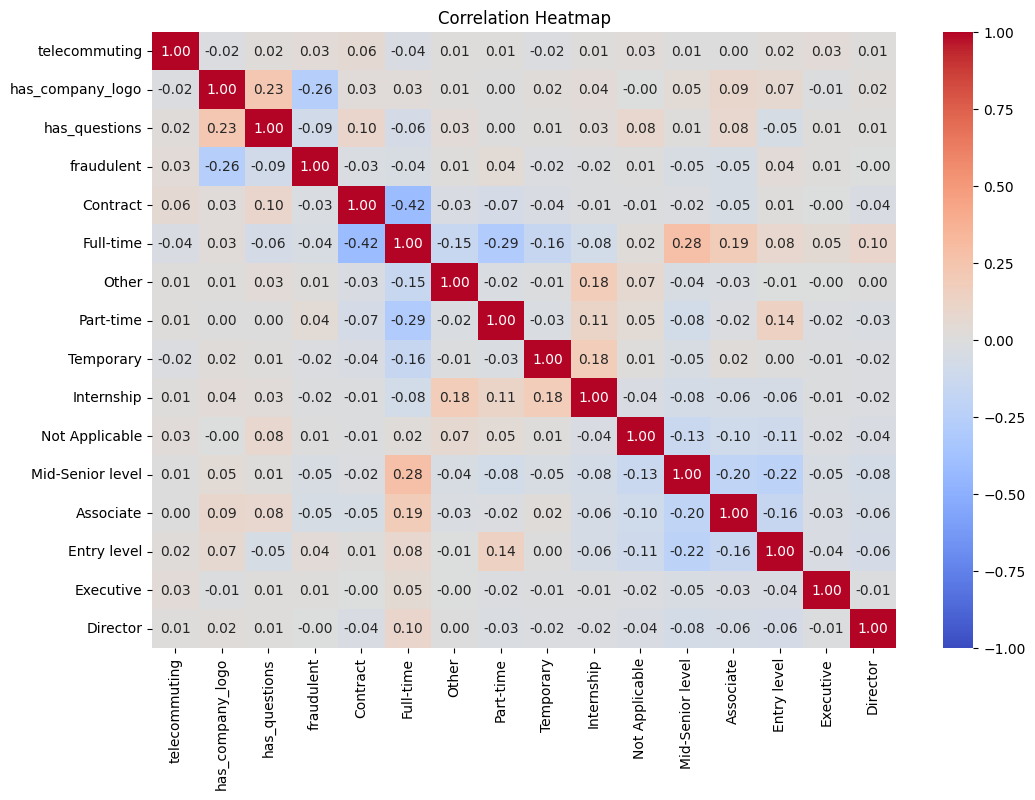

In [ ]:
jobs_corr = df_jobs2.corr()

plt.figure(figsize=(12,8))
# Extract the correlations of the target variable with the other features
target_corr = jobs_corr['fraudulent']
# Plot the correlation heatmap
sns.heatmap(jobs_corr, vmin = -1, vmax =1, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Text Analysis**

In [ ]:
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

In [ ]:
df_jobs[df_jobs['fraudulent'] == 0].Job_details

0        Marketing Intern US, NY, New York We're Food52...
1        Customer Service - Cloud Video Production NZ, ...
2        Commissioning Machinery Assistant (CMA) US, IA...
3        Account Executive - Washington DC US, DC, Wash...
4        Bill Review Manager US, FL, Fort Worth SpotSou...
                               ...                        
17875    Account Director - Distribution  CA, ON, Toron...
17876    Payroll Accountant US, PA, Philadelphia WebLin...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic Designer NG, LA, Lagos  Nemsia Studios...
17879    Web Application Developers NZ, N, Wellington V...
Name: Job_details, Length: 17014, dtype: object

**Cleaning Text**

In [ ]:
import os
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Set up NLTK
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

#Function to clean text data
def text_clean(job_details):
    if type(job_details) == np.float:
        return ""
    temp_job = job_details.lower()
    temp_job = re.sub("'", "", temp_job) 
    temp_job = re.sub("@[A-Za-z0-9_]+","", temp_job)
    temp_job = re.sub("[&#][A-Za-z0-9_]+","", temp_job)
    temp_job = re.sub(r'http\S+', '', temp_job)
    temp_job = re.sub(r"www.\S+", " ", temp_job)
    temp_job = re.sub('[()!?]', ' ', temp_job)
    temp_job = re.sub('\[.*?\]',' ', temp_job)
    temp_job = re.sub("[^a-z0-9]"," ", temp_job)
    job_det_tokens = word_tokenize(temp_job)
    job_det_list = []
    for i in job_det_tokens:
        if i not in stop_words:
            job_det_list.append(i)
    if len(job_det_list) == 0:
      return np.nan
    else:
      return ' '.join(job_det_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df_jobs['Job_details'] = df_jobs['Job_details'].apply(text_clean)
df_jobs.Job_details.head()

<ipython-input-37-8f5fbf7f49b7>:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(job_details) == np.float:


0    marketing intern us ny new york food52 weve cr...
1    customer service cloud video production nz auc...
2    commissioning machinery assistant cma us ia we...
3    account executive washington dc us dc washingt...
4    bill review manager us fl fort worth spotsourc...
Name: Job_details, dtype: object

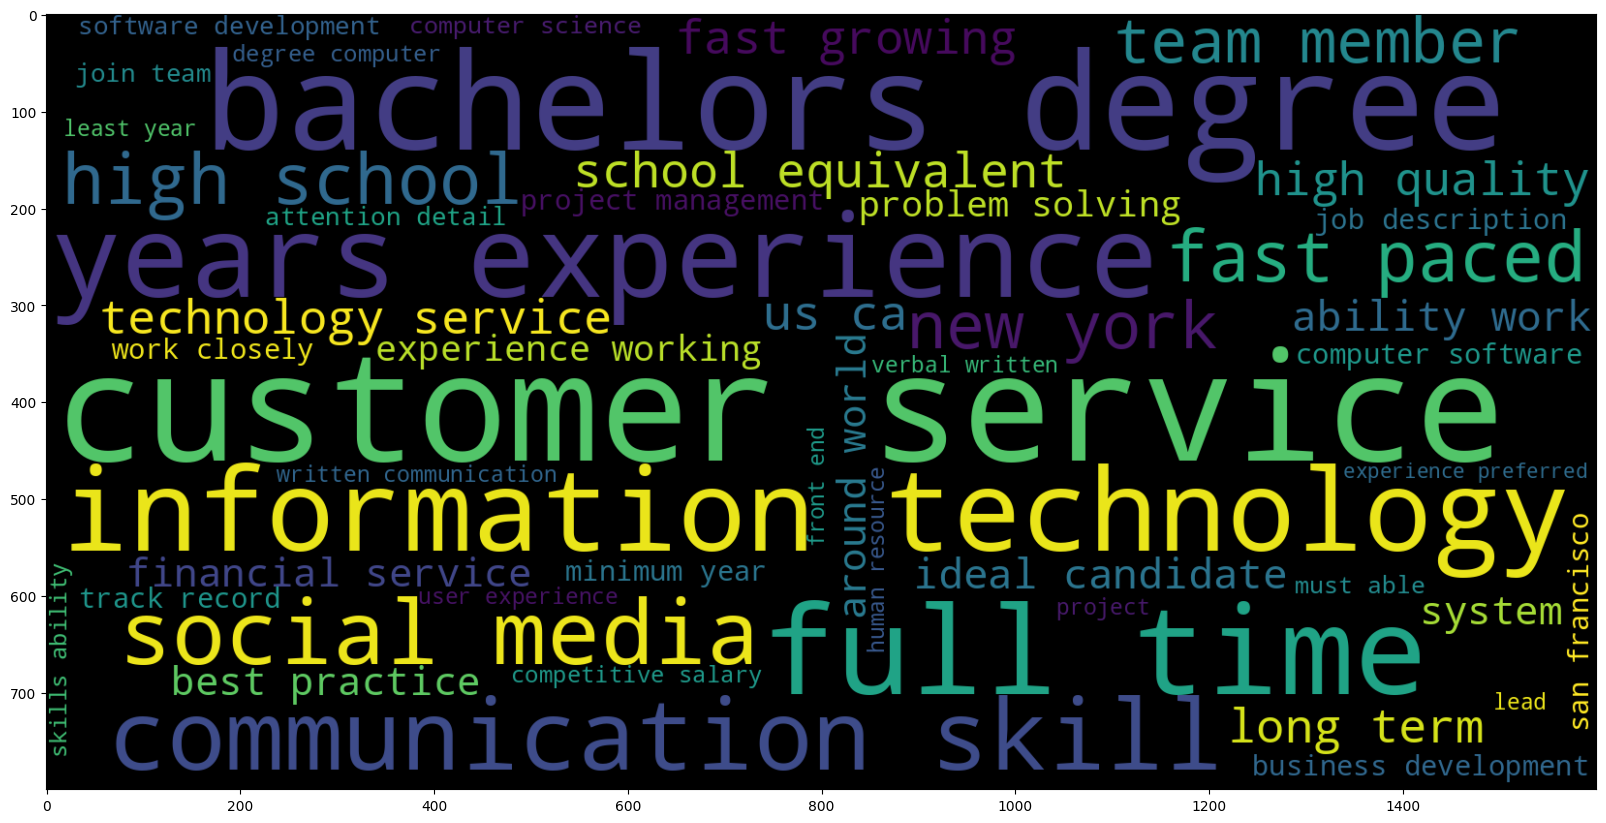

In [ ]:
plt.figure(figsize = (20,20)) # non fraudulent(1)
genuine_job_words = df_jobs[df_jobs['fraudulent'] == 0].Job_details
top_50_genuine_words = WordCloud(width = 1600 , height = 800 , max_words = 50).generate(" ".join(genuine_job_words))
plt.imshow(top_50_genuine_words , interpolation = 'bilinear')

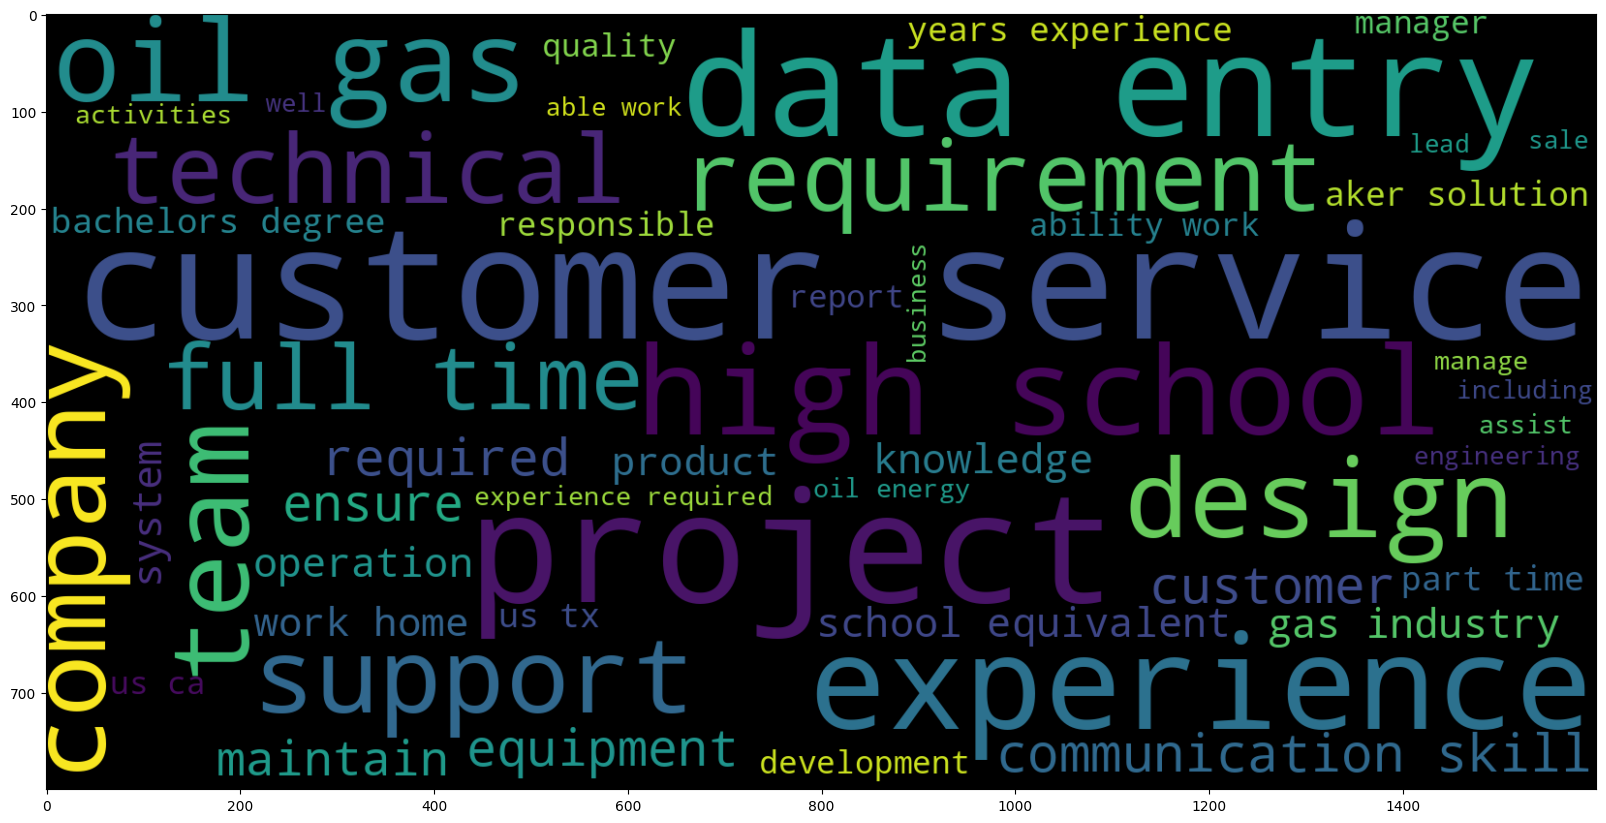

In [ ]:
plt.figure(figsize = (20,20)) # fraudulent(1)
fraud_job_words = df_jobs[df_jobs['fraudulent'] == 1].Job_details
top_50_fraud_words = WordCloud(width = 1600 , height = 800 , max_words = 50).generate(" ".join(fraud_job_words))
plt.imshow(top_50_fraud_words , interpolation = 'bilinear')

**Function to extract count of each word in fradulent and non-fradulent records**

In [ ]:
#Function to extract count of each word 
import re

def extract_words(text):
    words = re.findall('\w+', text.lower())
    return words

**1.For Fradulent records**

In [ ]:
df_frad_jobs = df_jobs[df_jobs['fraudulent']==1][['Job_details']]
df_frad_jobs['frad_words'] = df_frad_jobs['Job_details'].apply(extract_words)
list_frad_words = [word for sublist in df_frad_jobs['frad_words'] for word in sublist]
from collections import Counter
word_frad_freq = Counter(list_frad_words)
top_50_words_frad = word_frad_freq.most_common()
top_50_words_frad

[('work', 1774),
 ('experience', 1602),
 ('skills', 1170),
 ('us', 965),
 ('team', 856),
 ('company', 837),
 ('time', 823),
 ('service', 802),
 ('customer', 774),
 ('management', 753),
 ('engineering', 746),
 ('business', 739),
 ('services', 680),
 ('position', 679),
 ('data', 655),
 ('ability', 653),
 ('project', 616),
 ('high', 606),
 ('new', 576),
 ('required', 573),
 ('industry', 572),
 ('solutions', 546),
 ('must', 540),
 ('environment', 534),
 ('years', 528),
 ('support', 517),
 ('development', 500),
 ('knowledge', 490),
 ('products', 490),
 ('information', 485),
 ('job', 483),
 ('working', 481),
 ('looking', 478),
 ('systems', 466),
 ('sales', 464),
 ('within', 451),
 ('provide', 450),
 ('full', 449),
 ('product', 436),
 ('office', 435),
 ('technology', 432),
 ('people', 429),
 ('benefits', 421),
 ('entry', 421),
 ('including', 420),
 ('equipment', 417),
 ('process', 417),
 ('oil', 415),
 ('design', 410),
 ('communication', 409),
 ('candidates', 399),
 ('degree', 389),
 ('requir

**2. Non Fradulent Records**

In [ ]:
df_non_frad_jobs = df_jobs[df_jobs['fraudulent']==0][['Job_details']]
df_non_frad_jobs['non_frad_words'] = df_non_frad_jobs['Job_details'].apply(extract_words)
list_non_frad_words = [word for sublist in df_non_frad_jobs['non_frad_words'] for word in sublist]
from collections import Counter
word_non_freq = Counter(list_non_frad_words)
top_50_words_nonfrad = word_non_freq.most_common()
top_50_words_nonfrad

[('experience', 37868),
 ('work', 35513),
 ('team', 33197),
 ('us', 22551),
 ('business', 21905),
 ('company', 21115),
 ('skills', 18397),
 ('customer', 18340),
 ('new', 18267),
 ('services', 18247),
 ('management', 17824),
 ('sales', 17488),
 ('development', 15963),
 ('working', 15470),
 ('service', 15073),
 ('time', 14820),
 ('marketing', 14145),
 ('technology', 13535),
 ('years', 12974),
 ('design', 12657),
 ('people', 12622),
 ('software', 12058),
 ('ability', 11905),
 ('high', 11904),
 ('looking', 11828),
 ('product', 11809),
 ('clients', 11699),
 ('degree', 11489),
 ('job', 11366),
 ('solutions', 11089),
 ('data', 10697),
 ('knowledge', 10691),
 ('web', 10345),
 ('environment', 10100),
 ('support', 10070),
 ('including', 9923),
 ('based', 9917),
 ('help', 9696),
 ('well', 9621),
 ('customers', 9604),
 ('required', 9454),
 ('provide', 9442),
 ('information', 9216),
 ('client', 9129),
 ('communication', 8989),
 ('strong', 8757),
 ('must', 8560),
 ('one', 8503),
 ('quality', 8489),


In [ ]:
top_50_words_nonfrad_list = []
top_50_words_frad_list = []

for i in range(0,len(top_50_words_nonfrad)):
  top_50_words_nonfrad_list.append(top_50_words_nonfrad[i][0])
for j in range(0,len(top_50_words_frad)):
  top_50_words_frad_list.append(top_50_words_frad[j][0])

**Comparing non-fradulent and fradulent words and extracting words which are only present in fradulent jobs**

In [ ]:
set_non_fradulent = set(top_50_words_nonfrad_list)
set_fradulent = set(top_50_words_frad_list)
Only_Fradulent_words = list(set_fradulent.difference(set_non_fradulent))
Only_Fradulent_words

['supportingdocumentation',
 'thedemands',
 'robustexchange',
 'abell',
 'toemc',
 'operatorphotographersvideo',
 'portman',
 'servicespocono',
 'timebonus',
 'equivalentgood',
 'generationsystems',
 'abercrombie',
 'dealeranalysis',
 'systemsimplement',
 'industrywill',
 'etch',
 'gypsum',
 'groupsattention',
 'reliabilityexperience',
 'sally',
 'facilitiesand',
 'successlearning',
 'servicesbusiness',
 'andgovernment',
 'varius',
 'acomprehensive',
 'diplomapreferred',
 'iso9000',
 'accenturedetermines',
 'hardworkinggreat',
 'thesuccessful',
 'clearlyregular',
 'wireframesproduce',
 'teamup',
 'bonuseshow',
 'contributionsopportunity',
 'subsea',
 'ohiotown',
 'receiptsassists',
 'dearborn',
 'softening',
 'kaizens',
 'functionsimmediately',
 'healthcarelocation',
 'trainingdemonstrable',
 'psesoperating',
 'daycompany',
 'intesea',
 'efficitur',
 'fatigue',
 'javahtmlcucumberrubyseleniumelectric',
 'tasksas',
 'peri',
 'resorceful',
 'softwarerelational',
 'youwrite',
 'individuale

In [ ]:
#Total number of words that are only in fradulent jobs.
len(Only_Fradulent_words)

2571

In [ ]:
top_50_words_frad_dict = dict(top_50_words_frad)
only_frad_with_count = {elem: top_50_words_frad_dict[elem] for elem in Only_Fradulent_words if elem in top_50_words_frad_dict}
only_frad_with_count

{'supportingdocumentation': 6,
 'thedemands': 1,
 'robustexchange': 2,
 'abell': 1,
 'toemc': 1,
 'operatorphotographersvideo': 2,
 'portman': 1,
 'servicespocono': 1,
 'timebonus': 5,
 'equivalentgood': 1,
 'generationsystems': 1,
 'abercrombie': 1,
 'dealeranalysis': 1,
 'systemsimplement': 1,
 'industrywill': 1,
 'etch': 2,
 'gypsum': 1,
 'groupsattention': 1,
 'reliabilityexperience': 1,
 'sally': 1,
 'facilitiesand': 1,
 'successlearning': 1,
 'servicesbusiness': 1,
 'andgovernment': 1,
 'varius': 3,
 'acomprehensive': 1,
 'diplomapreferred': 1,
 'iso9000': 3,
 'accenturedetermines': 1,
 'hardworkinggreat': 1,
 'thesuccessful': 1,
 'clearlyregular': 1,
 'wireframesproduce': 1,
 'teamup': 1,
 'bonuseshow': 3,
 'contributionsopportunity': 2,
 'subsea': 156,
 'ohiotown': 1,
 'receiptsassists': 1,
 'dearborn': 1,
 'softening': 4,
 'kaizens': 1,
 'functionsimmediately': 1,
 'healthcarelocation': 1,
 'trainingdemonstrable': 1,
 'psesoperating': 2,
 'daycompany': 1,
 'intesea': 1,
 'effi

In [ ]:
#Words only in fradulent jobs and not in non-fradulent jobs.
only_frad_with_count_sort = dict(sorted(only_frad_with_count.items(), key=lambda x: x[1], reverse=True))
only_frad_with_count_sort

{'aker': 166,
 'subsea': 156,
 'accion': 74,
 'novation': 60,
 'overviewaker': 53,
 'fiit': 43,
 'makeing': 43,
 'recruitng': 43,
 'onlyclick': 42,
 'expro': 40,
 'bonues': 35,
 'scientifically': 35,
 'candidatescontinued': 35,
 'anyperkrelocation': 35,
 'aecom': 34,
 'vha': 28,
 'provista': 28,
 'futureaker': 27,
 'enovate': 24,
 'cartwright': 24,
 'accessquiet': 23,
 'suppliescomputer': 23,
 'distractionsmust': 23,
 'requirementsall': 22,
 'yearsdescriptionvalidate': 21,
 'westdept': 21,
 'interactiondedicated': 21,
 'nowapply': 21,
 'proccess': 21,
 'coppy': 21,
 'inbetween': 21,
 'adrian': 21,
 'formthank': 21,
 'spbu': 21,
 'locationapply': 19,
 'nowif': 19,
 'productiveextensive': 17,
 'effortsfun': 17,
 'balancefully': 17,
 'officeoffices': 17,
 'organazation': 16,
 'clearmark': 15,
 'mtkz': 14,
 'affilliates': 14,
 'shades': 14,
 'bows': 14,
 'mitel': 12,
 'dyncorp': 12,
 'townhome': 12,
 'intecsea': 12,
 'egovernment': 12,
 'hoas': 12,
 'fhcp': 11,
 'winterization': 11,
 'qhse

**Considering the top 5 words from above fradulent words for further analysis as they have number of occurances more than 50.**

In [ ]:
df_jobs2 = df_jobs[['Job_details','fraudulent']]
df_jobs2.head()

,Job_details,fraudulent
0,marketing intern us ny new york food52 weve cr...,0
1,customer service cloud video production nz auc...,0
2,commissioning machinery assistant cma us ia we...,0
3,account executive washington dc us dc washingt...,0
4,bill review manager us fl fort worth spotsourc...,0


In [ ]:
# taking top 5 keywords to search for
frad_keywords = list(only_frad_with_count_sort.keys())[:5]

# create new columns for each keyword with values 1 or 0
for kword in frad_keywords:
    pattern = r"\b{}\b".format(kword)
    df_jobs[kword] = df_jobs['Job_details'].str.contains(pattern, case=False, regex=True).apply(lambda x: 1 if x else 0)

df_jobs

,telecommuting,has_company_logo,has_questions,fraudulent,Contract,Full-time,Other,Part-time,Temporary,Internship,...,Associate,Entry level,Executive,Director,Job_details,aker,subsea,accion,novation,overviewaker
0,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,marketing intern us ny new york food52 weve cr...,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,customer service cloud video production nz auc...,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,commissioning machinery assistant cma us ia we...,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,account executive washington dc us dc washingt...,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,bill review manager us fl fort worth spotsourc...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,account director distribution ca toronto vend ...,0,0,0,0,0
17876,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,payroll accountant us pa philadelphia weblinc ...,0,0,0,0,0
17877,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,project cost control staff engineer cost contr...,0,0,0,0,0
17878,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,graphic designer ng la lagos nemsia studios lo...,0,0,0,0,0


**Dropping the job details column**

In [ ]:
df_jobs.drop(columns = 'Job_details',axis=1,inplace=True)
df_jobs.head()

,telecommuting,has_company_logo,has_questions,fraudulent,Contract,Full-time,Other,Part-time,Temporary,Internship,...,Mid-Senior level,Associate,Entry level,Executive,Director,aker,subsea,accion,novation,overviewaker
0,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_jobs.shape

(17880, 21)

In [ ]:
df_jobs[df_jobs['fraudulent']==0].shape

(17014, 21)

In [ ]:
df_jobs[df_jobs['fraudulent']==1].shape

(866, 21)

#Feature Selection

**Feature Selection using Chi Square Test**

In [ ]:
#Feature Selection using Chi Square Test
df_rem_col = df_jobs.drop('fraudulent', axis=1)
df_frad_col = df_jobs['fraudulent']
from sklearn.feature_selection import chi2
fp_values = chi2(df_rem_col,df_frad_col)
fp_values

(array([2.03957702e+01, 2.51182084e+02, 7.62988007e+01, 1.26546291e+01,
        9.89702589e+00, 1.53353679e+00, 3.41123982e+01, 8.42324981e+00,
        4.06952781e+00, 6.87760878e-01, 2.91092539e+01, 4.53028731e+01,
        1.88254170e+01, 1.54714410e+00, 1.89011143e-01, 1.02162587e+03,
        4.91166282e+02, 3.14346420e+02, 2.75053118e+02, 1.00197921e+03]),
 array([6.29688218e-006, 1.43462102e-056, 2.43831929e-018, 3.74636914e-004,
        1.65546101e-003, 2.15582410e-001, 5.20187714e-009, 3.70453063e-003,
        4.36634785e-002, 4.06927035e-001, 6.84094449e-008, 1.68801318e-011,
        1.43245435e-005, 2.13557545e-001, 6.63740912e-001, 3.57793097e-224,
        7.94407074e-109, 2.46835242e-070, 8.98754932e-062, 6.66893315e-220]))

In [ ]:
#Checking F Score for all the columns
f_values = pd.Series(fp_values[0])
f_values.index = df_rem_col.columns
f_values

telecommuting         20.395770
has_company_logo     251.182084
has_questions         76.298801
Contract              12.654629
Full-time              9.897026
Other                  1.533537
Part-time             34.112398
Temporary              8.423250
Internship             4.069528
Not Applicable         0.687761
Mid-Senior level      29.109254
Associate             45.302873
Entry level           18.825417
Executive              1.547144
Director               0.189011
aker                1021.625866
subsea               491.166282
accion               314.346420
novation             275.053118
overviewaker        1001.979215
dtype: float64

In [ ]:
f_values.sort_values(ascending=False)

aker                1021.625866
overviewaker        1001.979215
subsea               491.166282
accion               314.346420
novation             275.053118
has_company_logo     251.182084
has_questions         76.298801
Associate             45.302873
Part-time             34.112398
Mid-Senior level      29.109254
telecommuting         20.395770
Entry level           18.825417
Contract              12.654629
Full-time              9.897026
Temporary              8.423250
Internship             4.069528
Executive              1.547144
Other                  1.533537
Not Applicable         0.687761
Director               0.189011
dtype: float64

In [ ]:
#Checking P Values for all the columns
p_values = pd.Series(fp_values[1])
p_values.index = df_rem_col.columns
p_values

telecommuting        6.296882e-06
has_company_logo     1.434621e-56
has_questions        2.438319e-18
Contract             3.746369e-04
Full-time            1.655461e-03
Other                2.155824e-01
Part-time            5.201877e-09
Temporary            3.704531e-03
Internship           4.366348e-02
Not Applicable       4.069270e-01
Mid-Senior level     6.840944e-08
Associate            1.688013e-11
Entry level          1.432454e-05
Executive            2.135575e-01
Director             6.637409e-01
aker                3.577931e-224
subsea              7.944071e-109
accion               2.468352e-70
novation             8.987549e-62
overviewaker        6.668933e-220
dtype: float64

In [ ]:
p_values.sort_values(ascending = True)

aker                3.577931e-224
overviewaker        6.668933e-220
subsea              7.944071e-109
accion               2.468352e-70
novation             8.987549e-62
has_company_logo     1.434621e-56
has_questions        2.438319e-18
Associate            1.688013e-11
Part-time            5.201877e-09
Mid-Senior level     6.840944e-08
telecommuting        6.296882e-06
Entry level          1.432454e-05
Contract             3.746369e-04
Full-time            1.655461e-03
Temporary            3.704531e-03
Internship           4.366348e-02
Executive            2.135575e-01
Other                2.155824e-01
Not Applicable       4.069270e-01
Director             6.637409e-01
dtype: float64

**From the above chi square test, we could see that the columns with high F Score and low p values are highly important.
So, we can drop the columns with low F Score and high p values.** 

In [ ]:
from sklearn.feature_selection import SelectKBest
arr_jobs_new = SelectKBest(chi2, k=15).fit_transform(df_rem_col,df_frad_col)

# Get the indices of the selected features
selected_features_idx = SelectKBest(chi2, k=15).fit(df_rem_col, df_frad_col).get_support(indices=True)

# Get the names of the selected features
selected_features_names = df_rem_col.columns[selected_features_idx]

# Create a new DataFrame with the selected features
df_selected = pd.DataFrame(data=arr_jobs_new, columns=selected_features_names)
df_selected.head()

,telecommuting,has_company_logo,has_questions,Contract,Full-time,Part-time,Temporary,Mid-Senior level,Associate,Entry level,aker,subsea,accion,novation,overviewaker
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_selected.shape

(17880, 15)

In [ ]:
df_jobs['fraudulent'].shape

(17880,)

#Implementing Models

**1. Logistic Regression**

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")

# Split the dataset into training and testing sets
X = df_selected.copy()
y = df_jobs['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# oversample the minority class using RandomOverSampler as the data is imbalanced.
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
f1_logreg = f1_score(y_test, y_pred)
print('----------------------------------------------------------')
print('Model 1 - Logistic Regression')
print('Accuracy:', accuracy_logreg)
print('Precision:', precision_logreg)
print('Recall:', recall_logreg)
print('F1-score:', f1_logreg)
print('----------------------------------------------------------')

----------------------------------------------------------
Model 1 - Logistic Regression
Accuracy: 0.8055555555555556
Precision: 0.17833333333333334
Recall: 0.7896678966789668
F1-score: 0.2909585316111489
----------------------------------------------------------


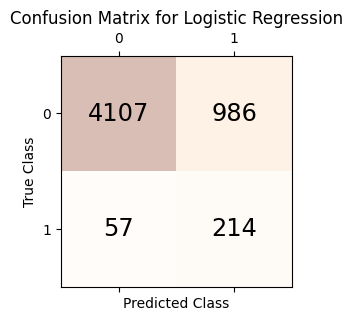

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
fig, ax = plt.subplots(figsize=(3, 3))
# Confusion matrix
df_conf_matrix = confusion_matrix(y_test, y_pred)
ax.matshow(df_conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(df_conf_matrix.shape[0]):
  for j in range(df_conf_matrix.shape[1]):
     ax.text(x=j, y=i,s=df_conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

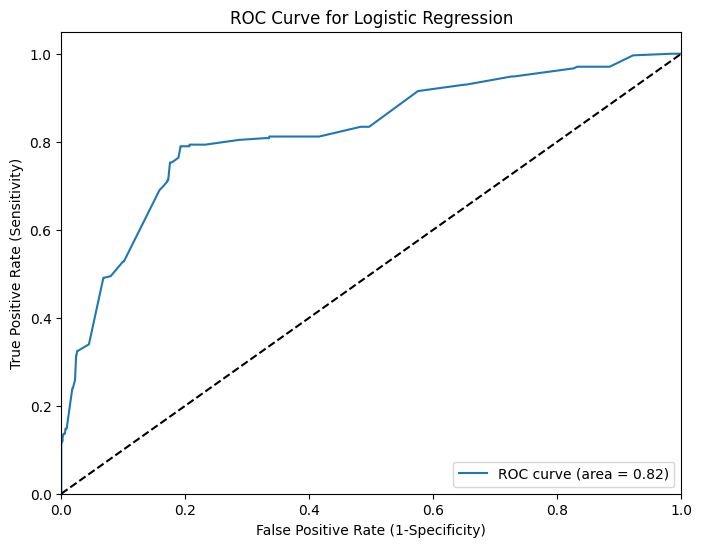

In [ ]:
# ROC curve
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


**2. Decision Trees**

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

# Split the dataset into training and testing sets
X = df_selected.copy()
y = df_jobs['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# oversample the minority class using RandomOverSampler as the data is imbalanced.
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Fit the Decision Trees model
dtc = DecisionTreeClassifier()
dtc.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = dtc.predict(X_test)

# Evaluate the model
accuracy_dtc = accuracy_score(y_test, y_pred)
precision_dtc = precision_score(y_test, y_pred)
recall_dtc = recall_score(y_test, y_pred)
f1_dtc = f1_score(y_test, y_pred)

print('----------------------------------------------------------')
print('Model 2 - Decision Tree')
print('Accuracy:', accuracy_dtc)
print('Precision:', precision_dtc)
print('Recall:', recall_dtc)
print('F1-score:', f1_dtc)
print('----------------------------------------------------------')


----------------------------------------------------------
Model 2 - Decision Tree
Accuracy: 0.8407904548844146
Precision: 0.2058526740665994
Recall: 0.7527675276752768
F1-score: 0.3232963549920761
----------------------------------------------------------


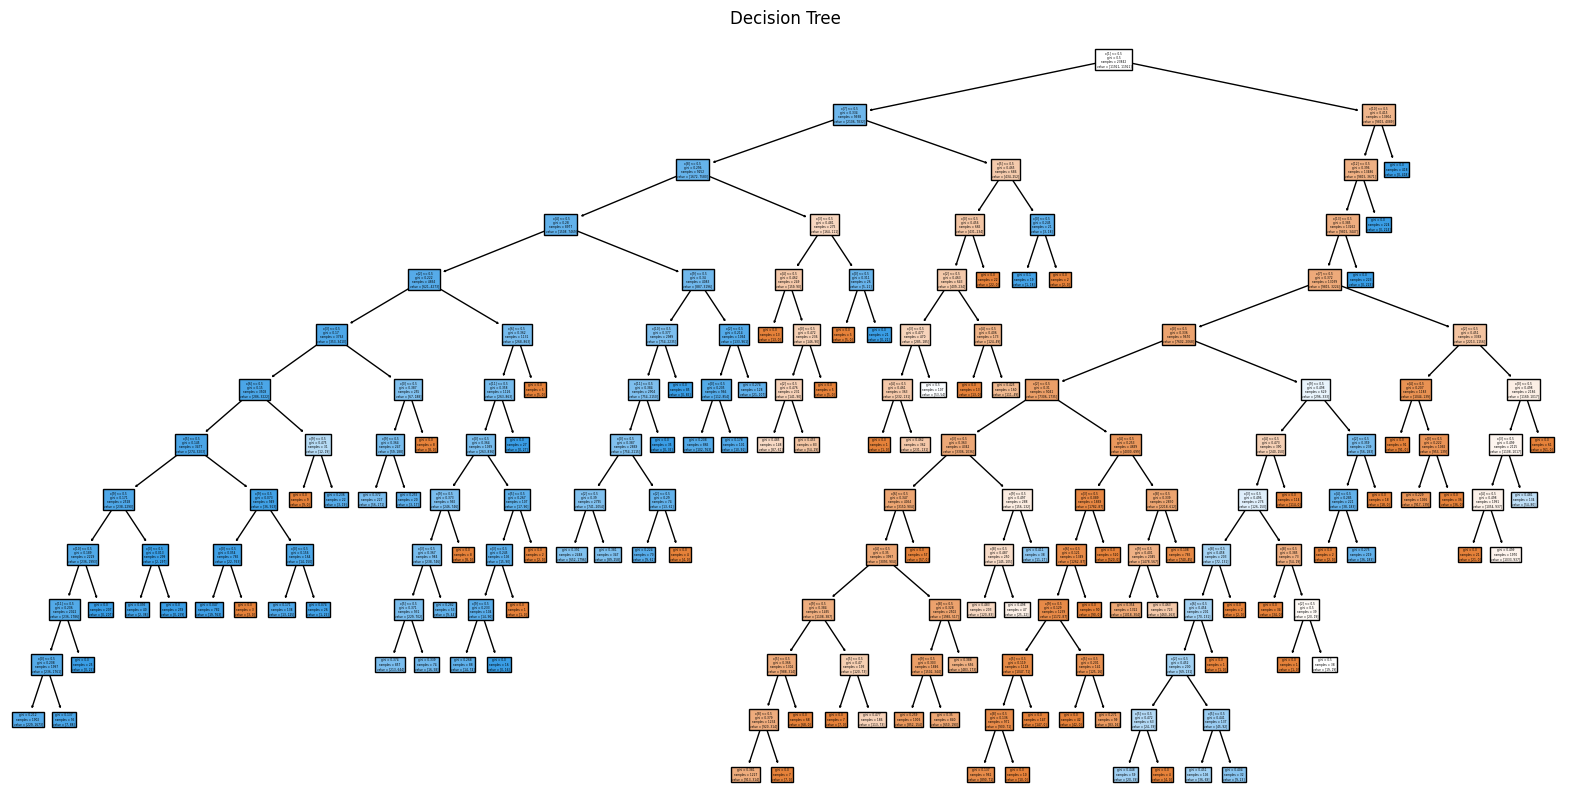

In [ ]:
from sklearn.tree import plot_tree

# Decision tree graph
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True)
plt.title('Decision Tree')
plt.show()

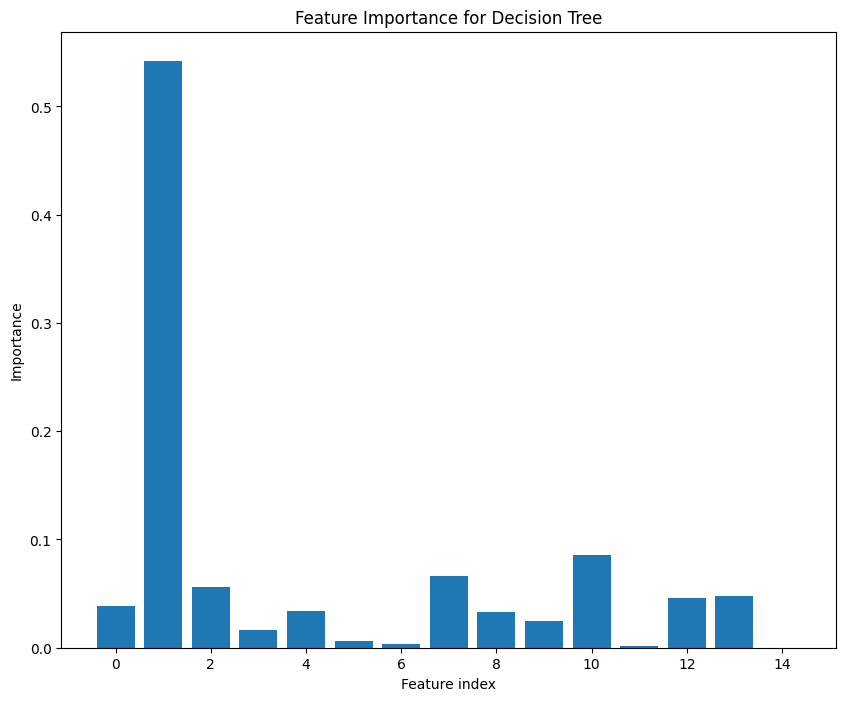

In [ ]:
# Feature importance
importance = dtc.feature_importances_
plt.figure(figsize=(10, 8))
plt.bar(range(len(importance)), importance)
plt.xlabel('Feature index')
plt.ylabel('Importance')
plt.title('Feature Importance for Decision Tree')
plt.show()


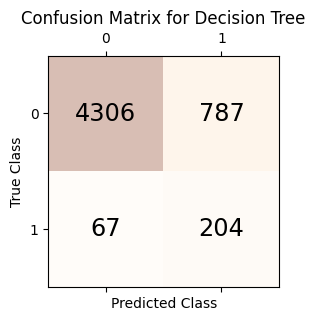

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
fig, ax = plt.subplots(figsize=(3, 3))
# Confusion matrix
df_conf_matrix = confusion_matrix(y_test, y_pred)
ax.matshow(df_conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(df_conf_matrix.shape[0]):
  for j in range(df_conf_matrix.shape[1]):
     ax.text(x=j, y=i,s=df_conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

**3. Random Forest**

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

# Split the dataset into training and testing sets
X = df_selected.copy()
y = df_jobs['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# oversample the minority class using RandomOverSampler as the data is imbalanced.
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Fit the Random Forest model
rfc = RandomForestClassifier()
rfc.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rfc.predict(X_test)

# Evaluate the model
accuracy_rfc = accuracy_score(y_test, y_pred)
precision_rfc = precision_score(y_test, y_pred)
recall_rfc = recall_score(y_test, y_pred)
f1_rfc = f1_score(y_test, y_pred)

print('----------------------------------------------------------')
print('Model 3 - Random Forest')
print('Accuracy:', accuracy_rfc)
print('Precision:', precision_rfc)
print('Recall:', recall_rfc)
print('F1-score:', f1_rfc)
print('----------------------------------------------------------')


----------------------------------------------------------
Model 3 - Random Forest
Accuracy: 0.8454511558538405
Precision: 0.20997920997921
Recall: 0.7453874538745388
F1-score: 0.32765612327656124
----------------------------------------------------------


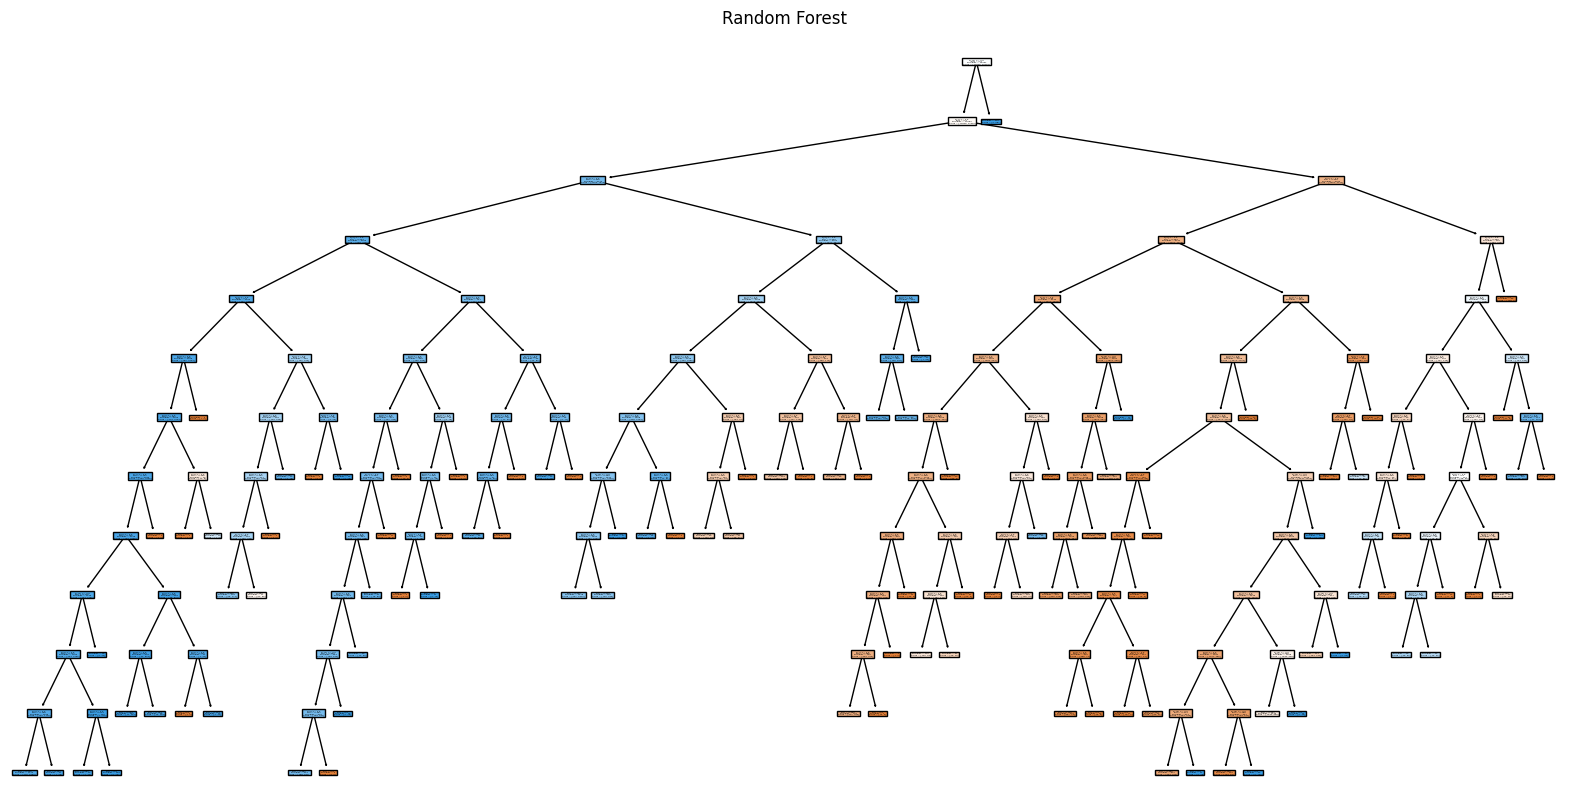

In [ ]:
# Random Forest tree graph
plt.figure(figsize=(20,10))
plot_tree(rfc.estimators_[0], filled=True)
plt.title('Random Forest')
plt.show()

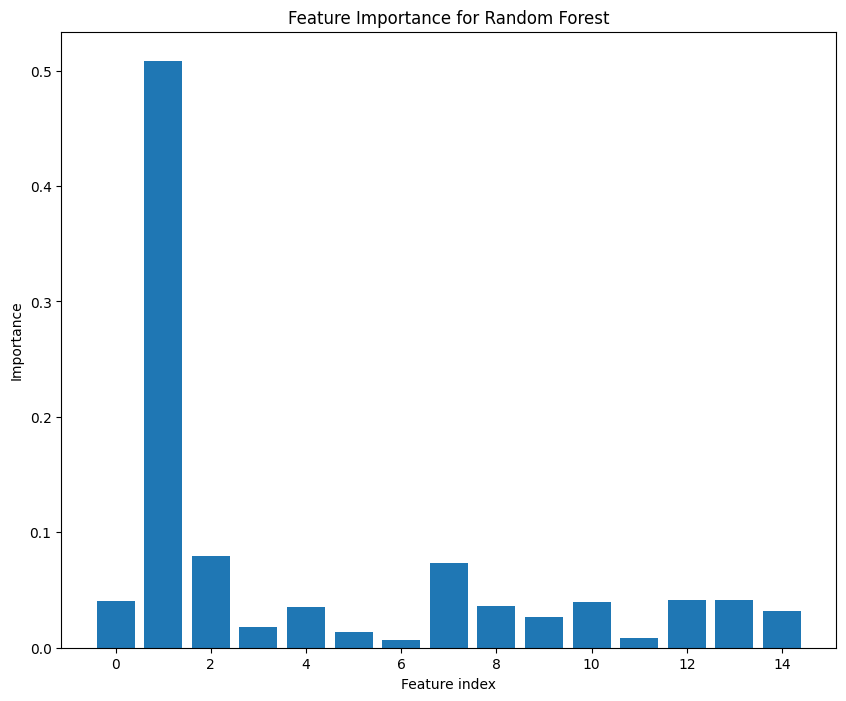

In [ ]:
# Feature importance
importance = rfc.feature_importances_
plt.figure(figsize=(10, 8))
plt.bar(range(len(importance)), importance)
plt.xlabel('Feature index')
plt.ylabel('Importance')
plt.title('Feature Importance for Random Forest')
plt.show()


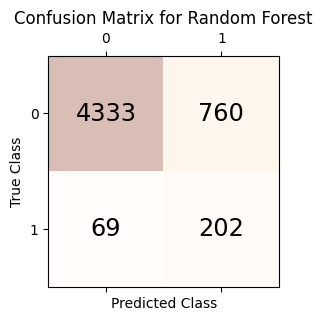

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
fig, ax = plt.subplots(figsize=(3, 3))
# Confusion matrix
df_conf_matrix = confusion_matrix(y_test, y_pred)
ax.matshow(df_conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(df_conf_matrix.shape[0]):
  for j in range(df_conf_matrix.shape[1]):
     ax.text(x=j, y=i,s=df_conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for Random Forest')
plt.show()

**4. Naive Bayes**

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

# Split the dataset into training and testing sets
X = df_selected.copy()
y = df_jobs['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# oversample the minority class using RandomOverSampler as the data is imbalanced.
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Fit the Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = bnb.predict(X_test)

# Evaluate the model
accuracy_bnb = accuracy_score(y_test, y_pred)
precision_bnb = precision_score(y_test, y_pred)
recall_bnb = recall_score(y_test, y_pred)
f1_bnb = f1_score(y_test, y_pred)

print('----------------------------------------------------------')
print('Model 4 - Naive Bayes')
print('Accuracy:', accuracy_bnb)
print('Precision:', precision_bnb)
print('Recall:', recall_bnb)
print('F1-score:', f1_bnb)
print('----------------------------------------------------------')

----------------------------------------------------------
Model 4 - Naive Bayes
Accuracy: 0.8070469798657718
Precision: 0.17681895093062605
Recall: 0.7712177121771218
F1-score: 0.2876806607019958
----------------------------------------------------------


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)


Confusion Matrix:
 [[4120  973]
 [  62  209]]


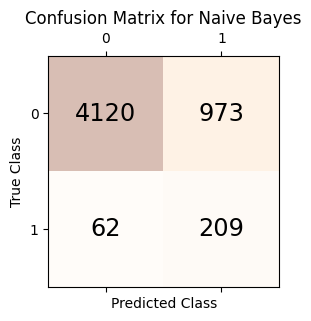

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
fig, ax = plt.subplots(figsize=(3, 3))
# Confusion matrix
df_conf_matrix = confusion_matrix(y_test, y_pred)
ax.matshow(df_conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(df_conf_matrix.shape[0]):
  for j in range(df_conf_matrix.shape[1]):
     ax.text(x=j, y=i,s=df_conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

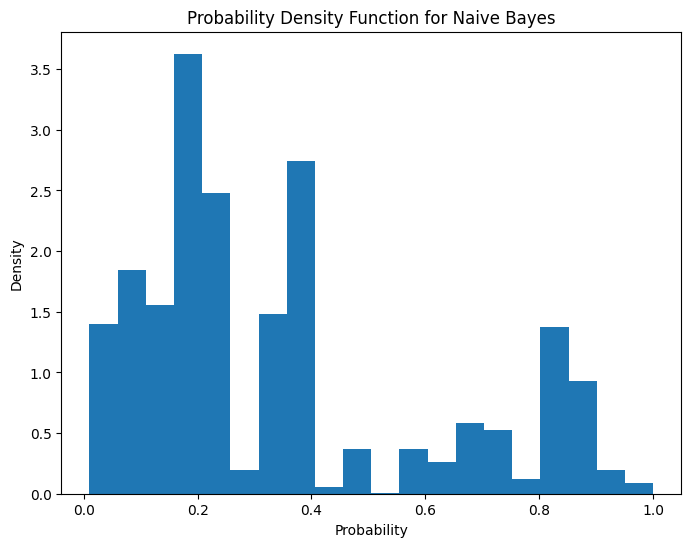

In [ ]:
# Probability Density Function (PDF) plot
y_pred_proba = bnb.predict_proba(X_test)[:, 1]
plt.figure(figsize=(8, 6))
plt.hist(y_pred_proba, bins=20, density=True)
plt.xlabel('Probability')
plt.ylabel('Density')
plt.title('Probability Density Function for Naive Bayes')
plt.show()


**5. KNN Model**

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Split the dataset into training and testing sets
X = df_selected.copy()
y = df_jobs['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# oversample the minority class using RandomOverSampler as the data is imbalanced.
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

print('----------------------------------------------------------')
print('Model 5 - K-Nearest Neighbors Model')
print('Accuracy:', accuracy_knn)
print('Precision:', precision_knn)
print('Recall:', recall_knn)
print('F1-score:', f1_knn)
print('----------------------------------------------------------')

----------------------------------------------------------
Model 5 - K-Nearest Neighbors Model
Accuracy: 0.9548844146159582
Precision: 0.9393939393939394
Recall: 0.11439114391143912
F1-score: 0.20394736842105263
----------------------------------------------------------


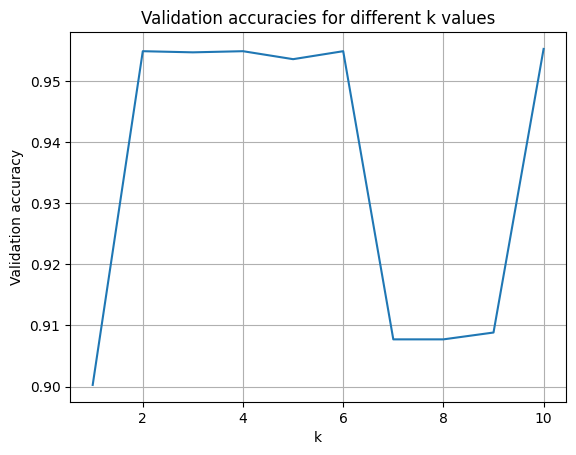

In [ ]:
from sklearn.metrics import accuracy_score

k_values = range(1, 11)
val_accuracies = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train_resampled, y_train_resampled)
    y_pred = knn_clf.predict(X_test)
    val_accuracy = accuracy_score(y_test, y_pred)
    val_accuracies.append(val_accuracy)


# Plot the validation accuracies for each k value
plt.plot(k_values, val_accuracies)
plt.xlabel("k")
plt.ylabel("Validation accuracy")
plt.title("Validation accuracies for different k values")
plt.grid()
plt.show()

In [ ]:
for k in k_values:
  print('For K=', k, ' Accuracy is ', val_accuracies[k-1])


For K= 1  Accuracy is  0.9002609992542878
For K= 2  Accuracy is  0.9548844146159582
For K= 3  Accuracy is  0.9546979865771812
For K= 4  Accuracy is  0.9548844146159582
For K= 5  Accuracy is  0.953579418344519
For K= 6  Accuracy is  0.9548844146159582
For K= 7  Accuracy is  0.9077181208053692
For K= 8  Accuracy is  0.9077181208053692
For K= 9  Accuracy is  0.9088366890380313
For K= 10  Accuracy is  0.9552572706935123


**Choosing best K as K = 4, as it has highest accuracy of 0.9548 and also the curve is stable at this point.**

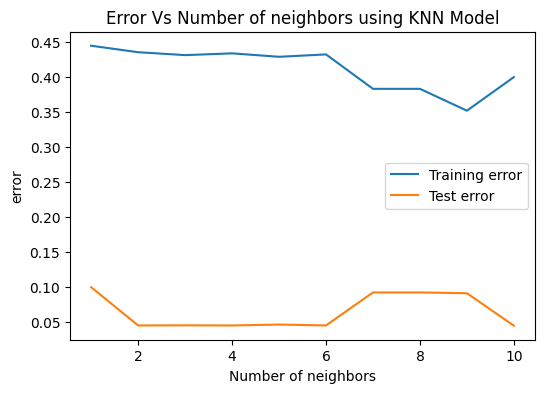

In [ ]:
# Number of neighbors
n_neighbors = range(1, 11)
train_errors = []
test_errors = []
for n in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train_resampled, y_train_resampled)
    train_errors.append(1 - model.score(X_train_resampled, y_train_resampled))
    test_errors.append(1 - model.score(X_test, y_test))
    
plt.figure(figsize=(6, 4))
plt.plot(n_neighbors, train_errors, label='Training error')
plt.plot(n_neighbors, test_errors, label='Test error')
plt.xlabel('Number of neighbors')
plt.ylabel('error')
plt.title('Error Vs Number of neighbors using KNN Model')
plt.legend()
plt.show()


**From the above graph, it is clear that the model is not overfitting**

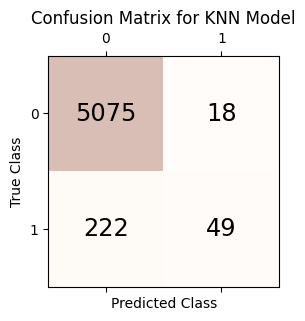

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
fig, ax = plt.subplots(figsize=(3, 3))
# Confusion matrix
df_conf_matrix = confusion_matrix(y_test, y_pred)
ax.matshow(df_conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(df_conf_matrix.shape[0]):
  for j in range(df_conf_matrix.shape[1]):
     ax.text(x=j, y=i,s=df_conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for KNN Model')
plt.show()

**6. XGBoost**

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

# Split the dataset into training and testing sets
X = df_selected.copy()
y = df_jobs['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# oversample the minority class using RandomOverSampler as the data is imbalanced.
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Create the XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Step 7: Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)

print('----------------------------------------------------------')
print('Model 6 - XGBoost Model')
print('Accuracy:', accuracy_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1-score:', f1_xgb)
print('----------------------------------------------------------')

----------------------------------------------------------
Model 6 - XGBoost Model
Accuracy: 0.8454511558538405
Precision: 0.209375
Recall: 0.7416974169741697
F1-score: 0.32656376929325753
----------------------------------------------------------


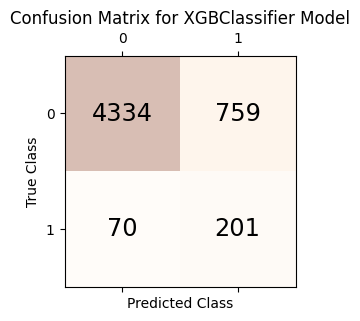

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
fig, ax = plt.subplots(figsize=(3, 3))
# Confusion matrix
df_conf_matrix = confusion_matrix(y_test, y_pred)
ax.matshow(df_conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(df_conf_matrix.shape[0]):
  for j in range(df_conf_matrix.shape[1]):
     ax.text(x=j, y=i,s=df_conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for XGBClassifier Model')
plt.show()

**Comparing the Evaluation metrics for all the above models**

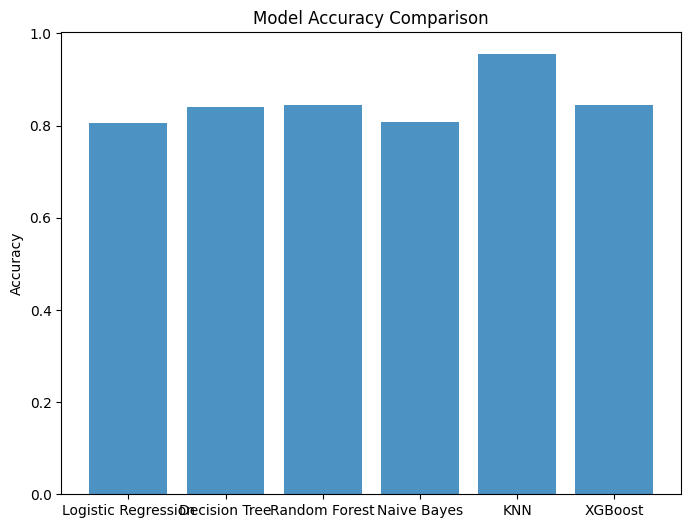

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy comparison bar chart
accuracy = [accuracy_logreg, accuracy_dtc, accuracy_rfc, accuracy_bnb, accuracy_knn, accuracy_xgb]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN', 'XGBoost']
y_pos = np.arange(len(models))

plt.figure(figsize=(8,6))
plt.bar(y_pos, accuracy, align='center', alpha=0.8)
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

plt.show()

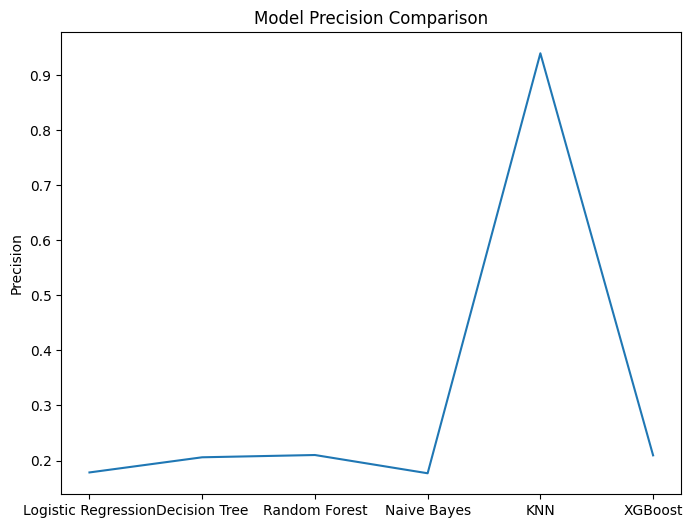

In [ ]:
# Precision comparison bar chart
precision = [precision_logreg, precision_dtc, precision_rfc, precision_bnb, precision_knn , precision_xgb]

plt.figure(figsize=(8,6))
plt.plot(y_pos, precision)
plt.xticks(y_pos, models)
plt.ylabel('Precision')
plt.title('Model Precision Comparison')

plt.show()


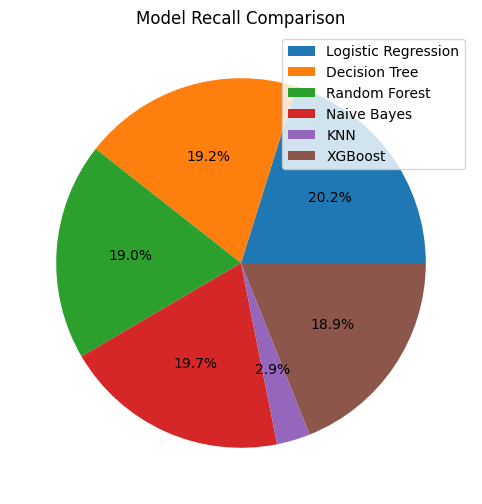

In [ ]:
# Recall comparison bar chart
recall = [recall_logreg, recall_dtc, recall_rfc , recall_bnb, recall_knn, recall_xgb]
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%'.format(pct, v=val)
        return my_format
plt.figure(figsize=(8,6))
plt.pie(recall, autopct=autopct_format(recall))
plt.title('Model Recall Comparison')
plt.legend(models,loc='upper right')
plt.show()


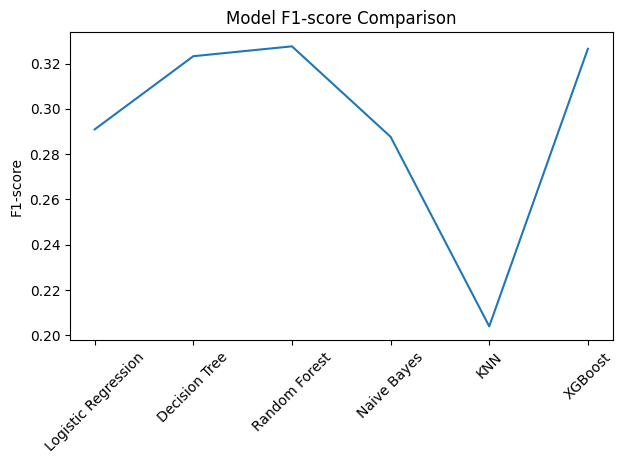

In [ ]:
# F1-score comparison bar chart
f1_score = [f1_logreg, f1_dtc, f1_rfc, f1_bnb, f1_knn, f1_xgb]

plt.figure(figsize=(7,4))
plt.plot(y_pos, f1_score)
plt.xticks(y_pos, models, rotation=45)
plt.ylabel('F1-score')
plt.title('Model F1-score Comparison')
plt.show()


**Comparing ROC Curves of all the models**

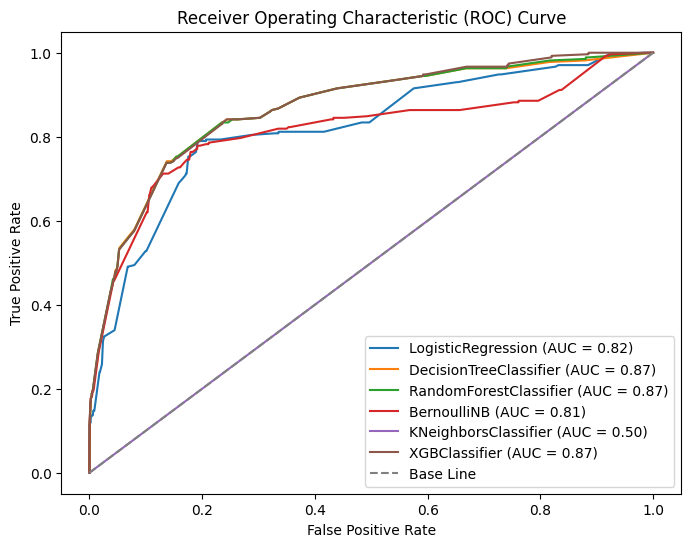

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler

X = df_selected.copy()
y = df_jobs['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# oversample the minority class using RandomOverSampler as the data is imbalanced.
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


# Define a dictionary to store the models and their predictions
models = {'Logistic Regression': logreg ,
          'Decision Tree': dtc,
          'Random Forest': rfc,
          'Naive Bayes': bnb,
          'K-Nearest Neighbors': knn,
          'XGBoost': xgb_model}

# Define a function to plot ROC curve for a given model
def plot_roc_curve(model, X_test, y_test):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(model.__class__.__name__, roc_auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))
for name, model in models.items():
    plot_roc_curve(model, X_test, y_test)

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Base Line')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


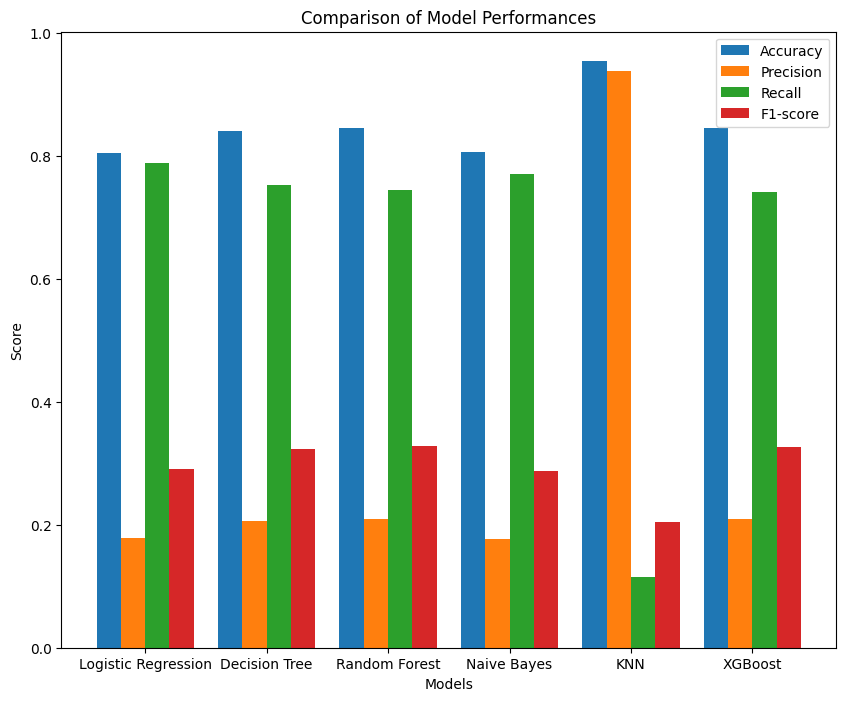

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN', 'XGBoost']

# Creating a combined bar chart for all the stats
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_score, width, label='F1-score')

# Add labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel('Score')
ax.set_xlabel('Models')
ax.set_title('Comparison of Model Performances')
ax.legend()

plt.show()


**Summary Table to shows all the models and their performance evaluation metrics**

In [ ]:
summary_dict = {'Model': models, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1_score}

summary_df = pd.DataFrame(summary_dict)

summary_df

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.805556,0.178333,0.789668,0.290959
1,Decision Tree,0.840790,0.205853,0.752768,0.323296
2,Random Forest,0.845451,0.209979,0.745387,0.327656
3,Naive Bayes,0.807047,0.176819,0.771218,0.287681
4,KNN,0.954884,0.939394,0.114391,0.203947
5,XGBoost,0.845451,0.209375,0.741697,0.326564


**Best Model:**
Looking at all the above stats, the best model for the given dataset seems to be the Random Forest model with an accuracy of 0.8454 and a precision of 0.21. Although the precision values of the KNN is higher than that of the Random Forest model, it's recall value is very lower, which means that there is a higher chance of missing out on positive instances.

The Naive Bayes, decision tree and Logistic regression models also have a high recall values, but they have significantly lower precision value and F1 score, which implies that it may not be suitable for this dataset. The K-Nearest Neighbors model has a lowest recall and F1 Score than all other models, making it unsuitable for this dataset.

Additionally, Random Forest models can handle categorical features well and can handle missing values in the dataset, making it a good choice for this nominal dataset. Therefore, the Random Forest model seems to be the best model for this dataset.


#Hyperparameter Tuning for the Best Model

In [ ]:
#importing librabries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

# Split the dataset into training and testing sets
X = df_selected.copy()
y = df_jobs['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# oversample the minority class using RandomOverSampler as the data is imbalanced.
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Create a Random Forest model
rfc = RandomForestClassifier()

In [ ]:
# Define the hyperparameters and their ranges for RandomizedSearchCV
param_dist = {'n_estimators': randint(50,500),
              'max_depth': [5, 10, 20, None],
              'min_samples_split': randint(2, 20),
              'min_samples_leaf': randint(1, 10),
              'max_features': ['sqrt', 'log2']}

# Perform RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the model's performance on the testing set
print("Best parameters from RandomizedSearchCV: ", random_search.best_params_)
print("Accuracy on testing set from RandomizedSearchCV: ", random_search.score(X_test, y_test))

Best parameters from RandomizedSearchCV:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 363}
Accuracy on testing set from RandomizedSearchCV:  0.8409768829231916


**As the default accuracy is better, will try to keep few parameters to default**

In [ ]:
# Define the hyperparameters and their ranges for RandomizedSearchCV
param_dist = {'n_estimators': [90,100,110],
              'max_depth': [5, 10, 20, None],
              'min_samples_split': randint(2, 20),
              'min_samples_leaf': randint(1, 10),
              'max_features': ['sqrt', 'log2'],
              'criterion' : ['gini','entropy','log_loss']}

# Perform RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the model's performance on the testing set
print("Best parameters from RandomizedSearchCV: ", random_search.best_params_)
print("Accuracy on testing set from RandomizedSearchCV: ", random_search.score(X_test, y_test))

Best parameters from RandomizedSearchCV:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 90}
Accuracy on testing set from RandomizedSearchCV:  0.8409768829231916


**Now, the model has same accuracy as initial one**

In [ ]:
rfc = RandomForestClassifier(n_estimators = 90, max_features = 'sqrt',max_depth = 20, criterion = 'gini', min_samples_leaf = 1, min_samples_split = 8)
# Define the hyperparameters and their ranges for RandomizedSearchCV
param_dist = {'bootstrap':[True, False],
              'max_samples':randint(10,500)}

# Perform RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the model's performance on the testing set
print("Best parameters from RandomizedSearchCV: ", random_search.best_params_)
print("Accuracy on testing set from RandomizedSearchCV: ", random_search.score(X_test, y_test))

Best parameters from RandomizedSearchCV:  {'bootstrap': True, 'max_samples': 445}
Accuracy on testing set from RandomizedSearchCV:  0.843027591349739


**From above, it is clear that default Parameters are giving the best performance compared to performance from best parameters choosen by RandomizedSearchCV technique**